In [1]:
## setup
import torch

import torchvision.transforms as transforms
import torchvision
import torch.nn as nn
import torch.optim as optim

import matplotlib.pyplot as plt
import numpy as np

## Visualizing individual data augmentation and verify

In [2]:
def get_color_distortion(s:float =1.0):
    """
    Function from the paper that create color distortion 
    s: float, the strength of color distortion 
    """
    color_jitter = transforms.ColorJitter(0.8*s, 0.8*s, 0.8*s, 0.2*s)
    rnd_color_jitter = transforms.RandomApply([color_jitter], p=0.8)
    rnd_gray = transforms.RandomGrayscale(p=0.2)
    color_distort = transforms.Compose([rnd_color_jitter, rnd_gray])
    return color_distort

In [3]:
# Visaulizing 4 different data augmentation

print('==> Preparing data..')
resize_crop = transforms.Compose([
    transforms.RandomResizedCrop(size=224,scale=(0.08,0.1),ratio=(0.75,1.33)),
    transforms.ToTensor(),
])

horizontal_flip = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor(),
])


color_transforms = transforms.Compose([
    get_color_distortion(),
    transforms.ToTensor(),
])

gaussian_blur = transforms.Compose([
    transforms.GaussianBlur(23, sigma=(0.1, 2.0)),
    transforms.ToTensor(),
])


==> Preparing data..


In [4]:
## this class is for creating two data augmentation per image 
class AugmentationPair(object):

    def __init__(self, base_transforms, n_views=2):
        self.base_transforms = base_transforms
        self.n_views = n_views #each images needs 2 data augmented pics 

    def __call__(self, x):
        return [self.base_transforms(x) for i in range(self.n_views)]

In [5]:
aug_crop = torchvision.datasets.CIFAR10(root='./data1', train=True, download=True,transform=AugmentationPair(resize_crop, 2))
aug_flip = torchvision.datasets.CIFAR10(root='./data2', train=True, download=True,transform=AugmentationPair(horizontal_flip,2))
aug_color = torchvision.datasets.CIFAR10(root='./data3', train=True, download=True,transform=AugmentationPair(color_transforms,2))
aug_blur = torchvision.datasets.CIFAR10(root='./data4', train=True, download=True,transform=AugmentationPair(gaussian_blur,2))


Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


In [6]:
## visualizing 6 sets of image (each image with 2 augmentation)

NUM_IMAGES = 6

imgs = torch.stack([img for idx in range(NUM_IMAGES) for img in aug_crop[idx][0]], dim=0)
img_grid_crop = torchvision.utils.make_grid(imgs, nrow=6, normalize=True, pad_value=0.9)
img_grid_crop = img_grid_crop.permute(1, 2, 0) # permute and make sure the color channel is the last one

imgs = torch.stack([img for idx in range(NUM_IMAGES) for img in aug_flip[idx][0]], dim=0)
img_grid_flip = torchvision.utils.make_grid(imgs, nrow=6, normalize=True, pad_value=0.9)
img_grid_flip = img_grid_flip.permute(1, 2, 0)

imgs = torch.stack([img for idx in range(NUM_IMAGES) for img in aug_color[idx][0]], dim=0)
img_grid_color = torchvision.utils.make_grid(imgs, nrow=6, normalize=True, pad_value=0.9)
img_grid_color = img_grid_color.permute(1, 2, 0)

imgs = torch.stack([img for idx in range(NUM_IMAGES) for img in aug_blur[idx][0]], dim=0)
img_grid_blur = torchvision.utils.make_grid(imgs, nrow=6, normalize=True, pad_value=0.9)
img_grid_blur = img_grid_blur.permute(1, 2, 0)



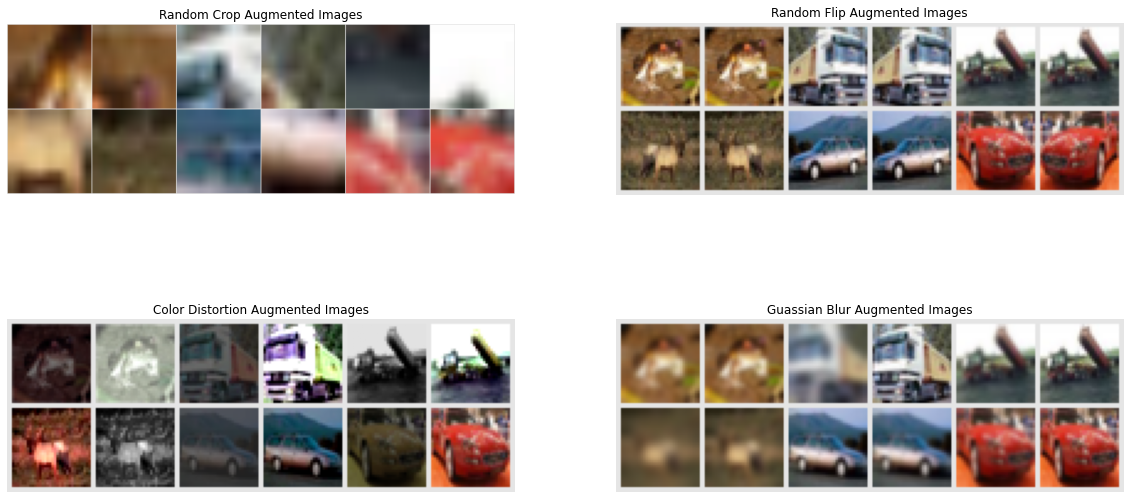

In [7]:
fig, axs = plt.subplots(2,2, figsize=(20,10))
axs[0, 0].imshow(img_grid_crop)
axs[0, 0].set_title("Random Crop Augmented Images")
axs[0, 0].axis('off')
axs[0, 1].imshow(img_grid_flip)
axs[0, 1].set_title("Random Flip Augmented Images")
axs[0, 1].axis('off')
axs[1, 0].imshow(img_grid_color)
axs[1, 0].set_title("Color Distortion Augmented Images")
axs[1, 0].axis('off')
axs[1, 1].imshow(img_grid_blur)
axs[1, 1].set_title("Guassian Blur Augmented Images")
axs[1, 1].axis('off')
plt.show()

## Putting them altogether

In [9]:
train_transform = transforms.Compose([
    transforms.GaussianBlur(23, sigma=(0.1, 2.0)),
    transforms.RandomResizedCrop(size=224,scale=(0.08,0.1),ratio=(0.75,1.33)),
    transforms.RandomHorizontalFlip(p=0.5),
    get_color_distortion(),
    transforms.ToTensor(),
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True,transform=AugmentationPair(train_transform, 2))



  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data


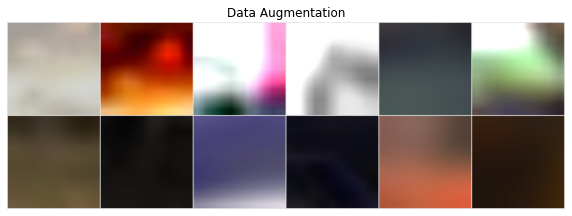

In [14]:
imgs = torch.stack([img for idx in range(6) for img in trainset[idx][0]], dim=0)
img_grid = torchvision.utils.make_grid(imgs, nrow=6, normalize=True, pad_value=0.9)
img_grid = img_grid.permute(1, 2, 0)

plt.figure(figsize=(10,5))
plt.imshow(img_grid)
plt.title("Data Augmentation")
plt.axis('off')
plt.show()